<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 4. Limpieza básica de datos**
- Identifica valores nulos en Titanic con `.isnull().sum()`
- Rellena "age" con mediana: `df['age'].fillna(df['age'].median(), inplace=True)`
- Elimina columna "deck": `df.drop('deck', axis=1, inplace=True)`
- Crea columna "family_size" = sibsp + parch + 1


# **Resolución del Reto 4: Limpieza básica de datos**

## **Paso 1: Importar librerías y cargar dataset**

In [1]:
# EJECUTA ESTE CÓDIGO PARA CARGAR EL DATASET
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("📦 Paso 1: Cargando dataset Titanic...")
df = sns.load_dataset('titanic')
print("✅ Dataset cargado correctamente")

print(f"📊 Dimensiones iniciales: {df.shape}")
print("👀 Primeras filas del dataset:")
df.head()

📦 Paso 1: Cargando dataset Titanic...
✅ Dataset cargado correctamente
📊 Dimensiones iniciales: (891, 15)
👀 Primeras filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Paso 2: Identificar valores nulos**

In [2]:
# EJECUTA ESTE CÓDIGO PARA IDENTIFICAR VALORES NULOS
print("🔍 Paso 2: Identificando valores nulos en el dataset...")

valores_nulos = df.isnull().sum()
print("📋 Valores nulos por columna:")
print(valores_nulos)

# Filtrar solo columnas con valores nulos
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print(f"\n🚨 Columnas con valores nulos: {len(columnas_con_nulos)}")

for columna, nulos in columnas_con_nulos.items():
    porcentaje = (nulos / len(df)) * 100
    print(f"   - {columna}: {nulos} nulos ({porcentaje:.1f}%)")

print(f"\n📈 Total de valores nulos en el dataset: {df.isnull().sum().sum()}")

🔍 Paso 2: Identificando valores nulos en el dataset...
📋 Valores nulos por columna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

🚨 Columnas con valores nulos: 4
   - age: 177 nulos (19.9%)
   - embarked: 2 nulos (0.2%)
   - deck: 688 nulos (77.2%)
   - embark_town: 2 nulos (0.2%)

📈 Total de valores nulos en el dataset: 869


## **Paso 3: Rellenar valores nulos en 'age' con la mediana**

🎯 Paso 3: Rellenando valores nulos en 'age' con la mediana...
📊 Estadísticas de 'age' antes de la limpieza:
   - Media: 29.70 años
   - Mediana: 28.00 años
   - Valores nulos: 177

✅ Después de rellenar con mediana:
   - Valores nulos en 'age': 0
   - Mediana utilizada: 28.00 años


/tmp/ipython-input-2378348296.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


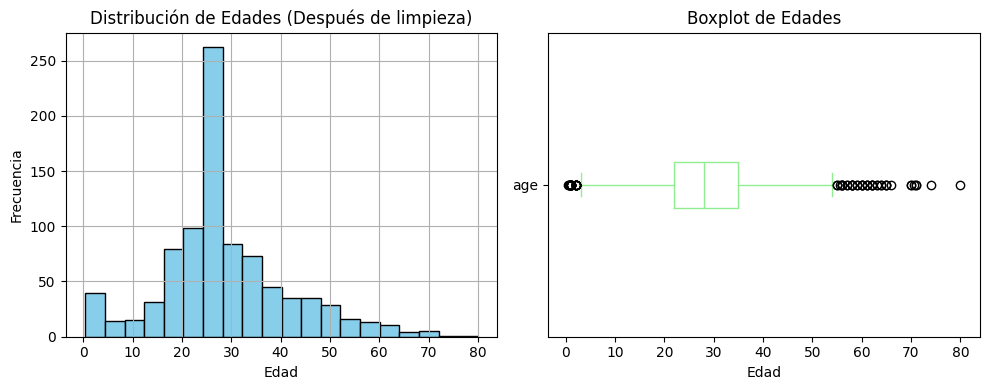

In [3]:
# EJECUTA ESTE CÓDIGO PARA RELLENAR EDADES NULAS
print("🎯 Paso 3: Rellenando valores nulos en 'age' con la mediana...")

# Calcular estadísticas antes de la limpieza
edad_media_antes = df['age'].mean()
edad_mediana_antes = df['age'].median()
nulos_age_antes = df['age'].isnull().sum()

print(f"📊 Estadísticas de 'age' antes de la limpieza:")
print(f"   - Media: {edad_media_antes:.2f} años")
print(f"   - Mediana: {edad_mediana_antes:.2f} años")
print(f"   - Valores nulos: {nulos_age_antes}")

# Rellenar valores nulos con la mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Verificar después de la limpieza
nulos_age_despues = df['age'].isnull().sum()
print(f"\n✅ Después de rellenar con mediana:")
print(f"   - Valores nulos en 'age': {nulos_age_despues}")
print(f"   - Mediana utilizada: {edad_mediana_antes:.2f} años")

# Mostrar distribución de edades
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades (Después de limpieza)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df['age'].plot(kind='box', vert=False, color='lightgreen')
plt.title('Boxplot de Edades')
plt.xlabel('Edad')

plt.tight_layout()
plt.show()

## **Paso 4: Eliminar columna 'deck'**

In [4]:
# EJECUTA ESTE CÓDIGO PARA ELIMINAR COLUMNA 'deck'
print("🗑️  Paso 4: Eliminando columna 'deck'...")

print("📋 Columnas antes de eliminar 'deck':")
print(f"   - Total: {len(df.columns)} columnas")
print(f"   - Lista: {list(df.columns)}")

# Información sobre la columna deck antes de eliminar
nulos_deck = df['deck'].isnull().sum()
print(f"\n📊 Información de la columna 'deck':")
print(f"   - Valores nulos: {nulos_deck} ({nulos_deck/len(df)*100:.1f}%)")
print(f"   - Valores únicos: {df['deck'].nunique()}")
print(f"   - Valores no nulos: {df['deck'].notnull().sum()}")

# Eliminar columna deck
df.drop('deck', axis=1, inplace=True)

print(f"\n✅ Columna 'deck' eliminada correctamente")
print(f"📋 Columnas después de eliminar 'deck':")
print(f"   - Total: {len(df.columns)} columnas")
print(f"   - Lista: {list(df.columns)}")

🗑️  Paso 4: Eliminando columna 'deck'...
📋 Columnas antes de eliminar 'deck':
   - Total: 15 columnas
   - Lista: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

📊 Información de la columna 'deck':
   - Valores nulos: 688 (77.2%)
   - Valores únicos: 7
   - Valores no nulos: 203

✅ Columna 'deck' eliminada correctamente
📋 Columnas después de eliminar 'deck':
   - Total: 14 columnas
   - Lista: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


## **Paso 5: Crear columna 'family_size'**

👨‍👩‍👧‍👦 Paso 5: Creando columna 'family_size'...
📊 Columnas base para el cálculo:
   - sibsp: Hermanos/cónyuges a bordo
   - parch: Padres/hijos a bordo

📈 Estadísticas de las columnas base:
   - sibsp: min=0, max=8, media=0.52
   - parch: min=0, max=6, media=0.38

✅ Columna 'family_size' creada correctamente
📊 Estadísticas de 'family_size':
   - Tamaño mínimo de familia: 1
   - Tamaño máximo de familia: 11
   - Tamaño promedio de familia: 1.90


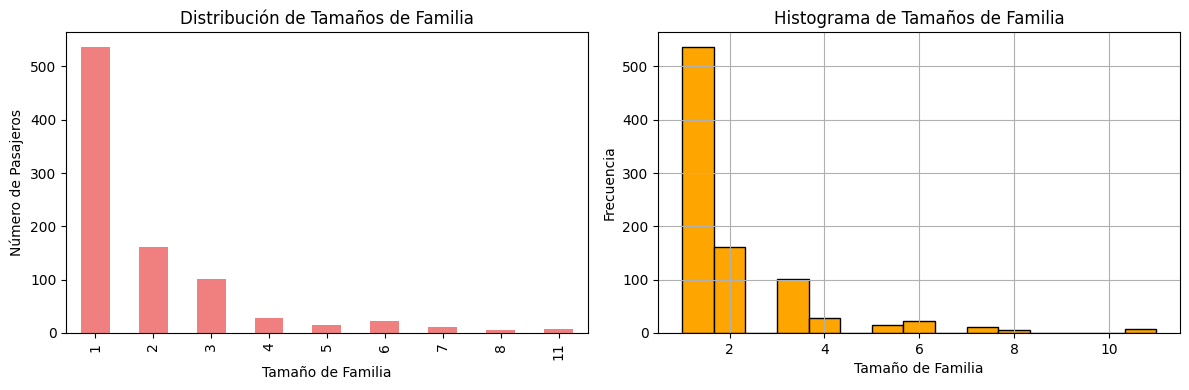

In [5]:
# EJECUTA ESTE CÓDIGO PARA CREAR COLUMNA 'family_size'
print("👨‍👩‍👧‍👦 Paso 5: Creando columna 'family_size'...")

print("📊 Columnas base para el cálculo:")
print(f"   - sibsp: Hermanos/cónyuges a bordo")
print(f"   - parch: Padres/hijos a bordo")

# Mostrar estadísticas de las columnas base
print(f"\n📈 Estadísticas de las columnas base:")
print(f"   - sibsp: min={df['sibsp'].min()}, max={df['sibsp'].max()}, media={df['sibsp'].mean():.2f}")
print(f"   - parch: min={df['parch'].min()}, max={df['parch'].max()}, media={df['parch'].mean():.2f}")

# Crear la nueva columna
df['family_size'] = df['sibsp'] + df['parch'] + 1

print(f"\n✅ Columna 'family_size' creada correctamente")
print(f"📊 Estadísticas de 'family_size':")
print(f"   - Tamaño mínimo de familia: {df['family_size'].min()}")
print(f"   - Tamaño máximo de familia: {df['family_size'].max()}")
print(f"   - Tamaño promedio de familia: {df['family_size'].mean():.2f}")

# Mostrar distribución de family_size
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['family_size'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribución de Tamaños de Familia')
plt.xlabel('Tamaño de Familia')
plt.ylabel('Número de Pasajeros')

plt.subplot(1, 2, 2)
df['family_size'].hist(bins=15, color='orange', edgecolor='black')
plt.title('Histograma de Tamaños de Familia')
plt.xlabel('Tamaño de Familia')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## **Paso 6: Verificar el estado final del dataset**

In [6]:
# EJECUTA ESTE CÓDIGO PARA VERIFICACIÓN FINAL
print("✅ Paso 6: Verificación final del dataset limpio...")

print(f"📊 DIMENSIONES FINALES:")
print(f"   - Filas: {df.shape[0]}")
print(f"   - Columnas: {df.shape[1]}")

print(f"\n📋 COLUMNAS FINALES:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\n🔍 VALORES NULOS FINALES:")
valores_nulos_finales = df.isnull().sum()
columnas_con_nulos_finales = valores_nulos_finales[valores_nulos_finales > 0]

if len(columnas_con_nulos_finales) > 0:
    print("⚠️  Aún existen columnas con valores nulos:")
    for columna, nulos in columnas_con_nulos_finales.items():
        print(f"   - {columna}: {nulos} nulos")
else:
    print("🎉 ¡No hay valores nulos en el dataset!")

print(f"\n📈 INFORMACIÓN DE NUEVAS COLUMNAS:")
print(f"   - family_size: min={df['family_size'].min()}, max={df['family_size'].max()}")
print(f"   - age: min={df['age'].min():.1f}, max={df['age'].max():.1f}, media={df['age'].mean():.1f}")

print(f"\n👀 MUESTRA FINAL DEL DATASET:")
df.head()


✅ Paso 6: Verificación final del dataset limpio...
📊 DIMENSIONES FINALES:
   - Filas: 891
   - Columnas: 15

📋 COLUMNAS FINALES:
    1. survived
    2. pclass
    3. sex
    4. age
    5. sibsp
    6. parch
    7. fare
    8. embarked
    9. class
   10. who
   11. adult_male
   12. embark_town
   13. alive
   14. alone
   15. family_size

🔍 VALORES NULOS FINALES:
⚠️  Aún existen columnas con valores nulos:
   - embarked: 2 nulos
   - embark_town: 2 nulos

📈 INFORMACIÓN DE NUEVAS COLUMNAS:
   - family_size: min=1, max=11
   - age: min=0.4, max=80.0, media=29.4

👀 MUESTRA FINAL DEL DATASET:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


## **Paso 7: Resumen de limpieza realizada**

In [7]:
# EJECUTA ESTE CÓDIGO PARA RESUMEN FINAL
print("🎯 Paso 7: Resumen de la limpieza de datos realizada")

print("\n" + "="*65)
print("              RESUMEN - LIMPIEZA DE DATOS TITANIC")
print("="*65)

print(f"\n📊 CAMBIOS REALIZADOS:")
print(f"   1. ✅ Valores nulos en 'age': RELLENADOS con mediana ({df['age'].median():.1f} años)")
print(f"   2. ✅ Columna 'deck': ELIMINADA (77% de valores nulos)")
print(f"   3. ✅ Nueva columna 'family_size': CREADA (sibsp + parch + 1)")

print(f"\n📈 RESULTADO FINAL:")
print(f"   - Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"   - Valores nulos restantes: {df.isnull().sum().sum()}")
print(f"   - Columnas eliminadas: 1 ('deck')")
print(f"   - Columnas creadas: 1 ('family_size')")

print(f"\n🔍 DATOS INTERESANTES:")
print(f"   - Tamaño familiar más común: {df['family_size'].mode().values[0]} persona(s)")
print(f"   - Porcentaje de pasajeros solos: {(df['family_size'] == 1).sum()/len(df)*100:.1f}%")
print(f"   - Edad más frecuente: {df['age'].mode().values[0]} años")

print(f"\n🎉 ¡Reto 4 completado! Dataset limpio y listo para análisis")
print("="*65)

🎯 Paso 7: Resumen de la limpieza de datos realizada

              RESUMEN - LIMPIEZA DE DATOS TITANIC

📊 CAMBIOS REALIZADOS:
   1. ✅ Valores nulos en 'age': RELLENADOS con mediana (28.0 años)
   2. ✅ Columna 'deck': ELIMINADA (77% de valores nulos)
   3. ✅ Nueva columna 'family_size': CREADA (sibsp + parch + 1)

📈 RESULTADO FINAL:
   - Dimensiones: 891 filas × 15 columnas
   - Valores nulos restantes: 4
   - Columnas eliminadas: 1 ('deck')
   - Columnas creadas: 1 ('family_size')

🔍 DATOS INTERESANTES:
   - Tamaño familiar más común: 1 persona(s)
   - Porcentaje de pasajeros solos: 60.3%
   - Edad más frecuente: 28.0 años

🎉 ¡Reto 4 completado! Dataset limpio y listo para análisis


## 🎯 **Técnicas de limpieza aplicadas:**

1. **Manejo de valores nulos**: Relleno con mediana (robusta a outliers)
2. **Eliminación de columnas**: Cuando tienen demasiados valores faltantes
3. **Creación de features**: Combinación de variables existentes
4. **Verificación sistemática**: Confirmación de cada operación